# Standard Bank Data Analytics Project 20220530

## Data Set Treatment

### 1. I opened the Dataset and saved it in the new CSV format file that is more suitable for ETL.

### 2. After already in CSV format, i transform data from single column to tables structure using Excel POWER QUERY and save it.

### 3. Compress csv in tgz format and uploaded it to the GitHub repository, to ensure that the code runs in any location as long as it is connected to internet.


##### Dataset link: https://raw.githubusercontent.com/Jeremias-Tivane/General/main/datasets/Data-analytics-project-dataset.tgz

### 1.Setup

In [90]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import io
import os
import tarfile
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 2.Get the Data

#### 2.1.Download the Data

In [ ]:
#Download file data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Jeremias-Tivane/General/main/"
HOUSING_PATH = os.path.join("datasets", "eda")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/Data-analytics-project-dataset.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "eda.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [8]:
#Loading data
def load_eda_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "Data-analytics-project-dataset.csv")
    return pd.read_csv(csv_path)

### 3.Take a Quick Look at the Data Structure


#### 3.1.Reading Data

In [9]:
#Reading Data
eda = load_eda_data()
eda.head()

,InsurProductID,InsurCustomerID,Sub Seg,Insurance Currency,Insur Sub Name,Insur Bank Related,Insur PackName,Product Status,Insur Value,Insur Open Date,...,NO_OF_TRXNS202007,NO_OF_TRXNS202008,NO_OF_TRXNS202009,NO_OF_TRXNS202010,TURNOVER202005,TURNOVER202006,TURNOVER202007,TURNOVER202008,TURNOVER202009,TURNOVER202010
0,LFC484L84,475143751,EXCELLENCE,MZN,SEGURO DE VIDA,BANK PRODUCTS RELATED,LIFE,ACTIVE,0.0,3/26/2013 0:00,...,61.0,83.0,61.0,59.0,238558.202800,262221.488800,301020.335,229569.026300,226266.91480,217867.911800
1,HOC484H84,475143751,EXCELLENCE,MZN,SEGURO DE INC�NDIO HABITA��O,BANK PRODUCTS RELATED,HOUSE.OWNER,ACTIVE,0.0,3/26/2013 0:00,...,61.0,83.0,61.0,59.0,238558.202800,262221.488800,301020.335,229569.026300,226266.91480,217867.911800
2,SBS025S25,628865188,GENNESIS,MZN,PLANO SALARIO,NON BANK RELATED,SP.BLUE,CANCELLED,0.0,7/3/2018 0:00,...,8.0,7.0,18.0,11.0,7968.063462,7377.836538,8043.900,9608.753222,9207.52363,8935.090323
3,SBS149S49,169913599,PMO2,MZN,NaN,NON BANK RELATED,NaN,ACTIVE,0.0,7/31/2019 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SBS005S05,558654486,FAMMILY,MZN,NaN,NON BANK RELATED,NaN,ACTIVE,0.0,9/12/2019 0:00,...,24.0,31.0,26.0,52.0,370471.997200,251616.888800,61927.235,73461.539000,53934.81200,145213.386900


#### 3.2.Reading tail data

In [10]:
#Reading tail data
eda.tail()

,InsurProductID,InsurCustomerID,Sub Seg,Insurance Currency,Insur Sub Name,Insur Bank Related,Insur PackName,Product Status,Insur Value,Insur Open Date,...,NO_OF_TRXNS202007,NO_OF_TRXNS202008,NO_OF_TRXNS202009,NO_OF_TRXNS202010,TURNOVER202005,TURNOVER202006,TURNOVER202007,TURNOVER202008,TURNOVER202009,TURNOVER202010
84392,SBL130S30,586156461,GENNESIS,MZN,PLANO VIDA STANDALONE,NON BANK RELATED,LIFE.BLUE,ACTIVE,200.0,8/27/2020 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84393,SBL027S27,587553575,GENNESIS,MZN,PLANO VIDA STANDALONE,NON BANK RELATED,LIFE.BLUE,ACTIVE,200.0,8/27/2020 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84394,SBL093S93,603760737,GENNESIS,MZN,PLANO VIDA STANDALONE,NON BANK RELATED,LIFE.BLUE,ACTIVE,200.0,8/27/2020 0:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
84395,SBL202S02,641568115,GENNESIS,MZN,PLANO VIDA STANDALONE,NON BANK RELATED,LIFE.BLUE,ACTIVE,200.0,8/27/2020 0:00,...,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0,5585.644981,4989.665887
84396,SBL203S03,641668116,GENNESIS,MZN,PLANO VIDA STANDALONE,NON BANK RELATED,LIFE.BLUE,ACTIVE,200.0,8/27/2020 0:00,...,0.0,0.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.3.Count of total rows and columns

In [19]:
#Count of total rows and columns
eda.shape

(84397, 26)

#### 3.3.Checking Columns info

In [12]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   InsurProductID           84397 non-null  object 
 1   InsurCustomerID          84397 non-null  int64  
 2   Sub Seg                  84397 non-null  object 
 3   Insurance Currency       84397 non-null  object 
 4   Insur Sub Name           84230 non-null  object 
 5   Insur Bank Related       84397 non-null  object 
 6   Insur PackName           84230 non-null  object 
 7   Product Status           84397 non-null  object 
 8   Insur Value              84397 non-null  float64
 9   Insur Open Date          75897 non-null  object 
 10  Insur Cancellation Date  31488 non-null  object 
 11  Insur end date           376 non-null    object 
 12  Next Pay Date            74929 non-null  object 
 13  Last Pay Date            56408 non-null  object 
 14  NO_OF_TRXNS202005     

#### 3.3.2. Quantity of records in each columns.

In [25]:
#Records in each columns.
eda.nunique()

InsurProductID              6818
InsurCustomerID            59832
Sub Seg                        8
Insurance Currency             2
Insur Sub Name                13
Insur Bank Related             2
Insur PackName                28
Product Status                 4
Insur Value                  519
Insur Open Date             2781
Insur Cancellation Date       60
Insur end date               155
Next Pay Date                196
Last Pay Date                292
NO_OF_TRXNS202005            309
NO_OF_TRXNS202006            309
NO_OF_TRXNS202007            326
NO_OF_TRXNS202008            440
NO_OF_TRXNS202009            474
NO_OF_TRXNS202010            465
TURNOVER202005             29107
TURNOVER202006             28275
TURNOVER202007             28341
TURNOVER202008             29451
TURNOVER202009             29465
TURNOVER202010             30557
dtype: int64

#### 3.3.3. Checking Columns, general table info

In [26]:
#Check information about tables, data type and table size.
eda.describe()

,InsurCustomerID,Insur Value,NO_OF_TRXNS202005,NO_OF_TRXNS202006,NO_OF_TRXNS202007,NO_OF_TRXNS202008,NO_OF_TRXNS202009,NO_OF_TRXNS202010,TURNOVER202005,TURNOVER202006,TURNOVER202007,TURNOVER202008,TURNOVER202009,TURNOVER202010
count,8.439700e+04,84397.000000,65810.000000,65810.000000,65810.000000,65810.000000,65810.000000,65810.000000,6.580900e+04,6.580900e+04,6.580900e+04,6.580900e+04,6.580900e+04,6.580900e+04
mean,6.005025e+08,165.199356,15.521182,15.713524,16.913858,22.671980,25.239872,25.505972,1.301146e+05,1.345854e+05,1.305475e+05,1.647099e+05,1.628876e+05,1.690857e+05
std,2.660101e+08,60.405972,31.680277,33.621740,37.077391,62.191828,71.374974,73.766279,3.067887e+06,3.226276e+06,3.108548e+06,4.384427e+06,4.696234e+06,5.279932e+06
min,1.000106e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.092425e+08,140.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.518519e+01,9.350000e-02,1.195484e-01
50%,5.899503e+08,196.000000,5.000000,5.000000,6.000000,7.000000,8.000000,8.000000,6.997135e+03,7.064316e+03,7.253000e+03,7.339332e+03,7.736446e+03,7.861677e+03
75%,9.108958e+08,200.000000,20.000000,20.000000,22.000000,26.000000,29.000000,30.000000,2.600057e+04,2.544638e+04,2.657432e+04,2.666167e+04,2.782963e+04,2.853390e+04
max,9.999975e+08,200.000000,670.000000,794.000000,1063.000000,2349.000000,2706.000000,2975.000000,2.305498e+08,1.634925e+08,1.581830e+08,2.209784e+08,2.465226e+08,2.798650e+08


Saving figure attribute_histogram_plots


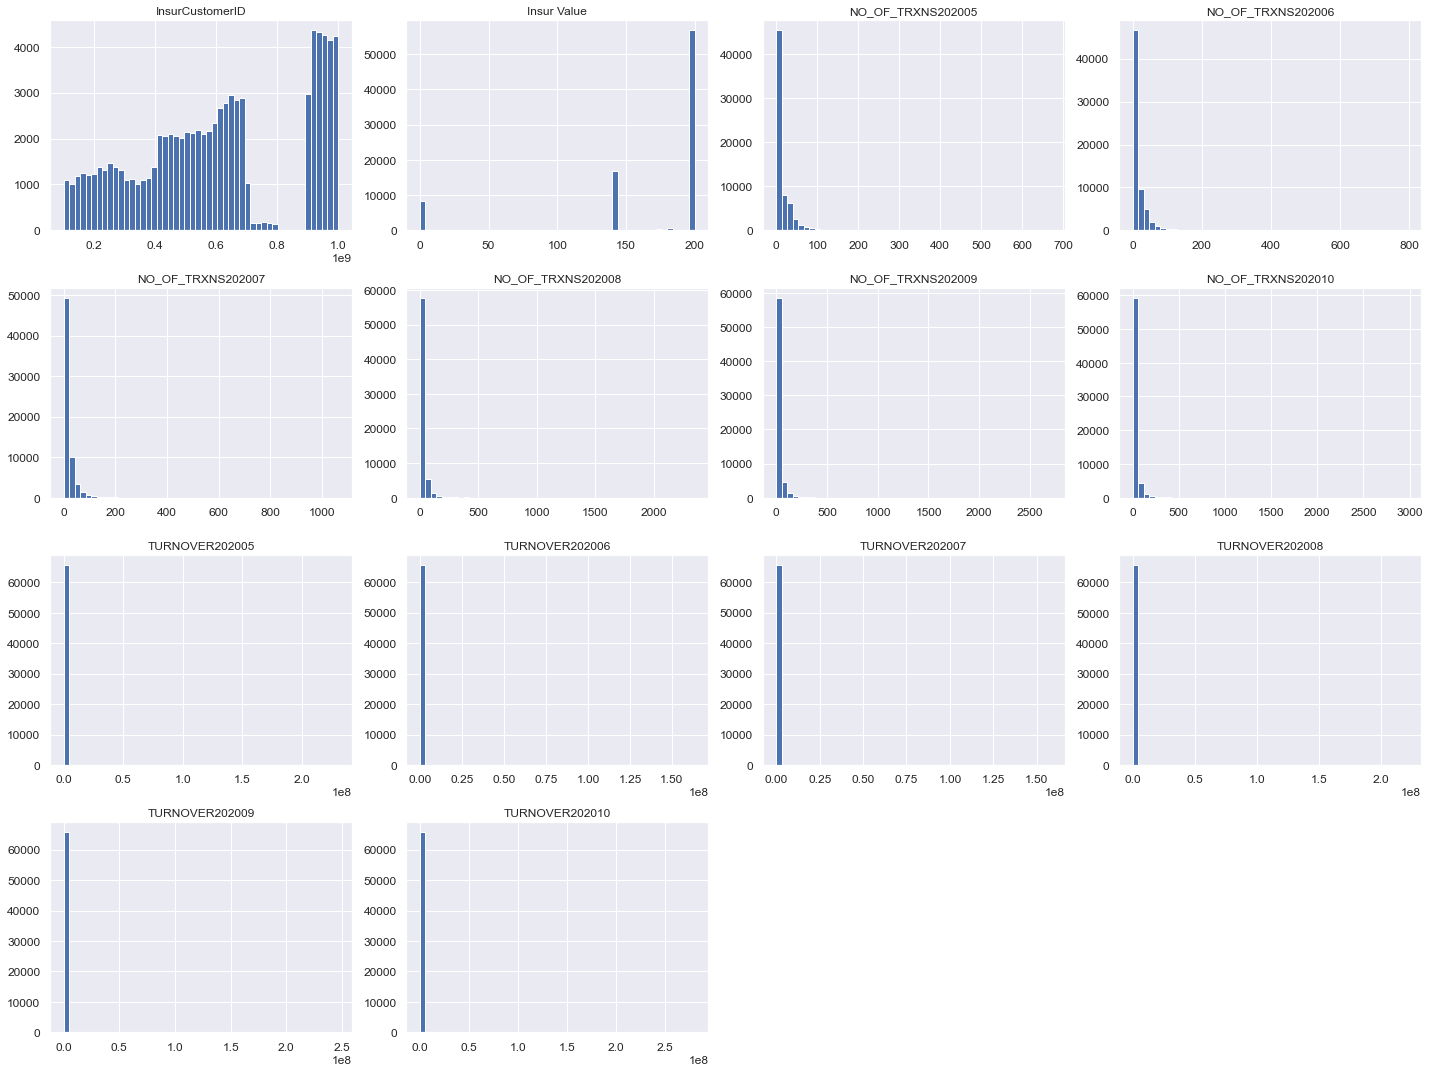

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
eda.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

#### 3.4. Number of customers in each segmentation.

In [27]:
#customers in each segmentation.
eda["Sub Seg"].value_counts()

GENNESIS      57805
FAMMILY       23773
PLATIUM        1800
EXCELLENCE      664
PMO2            221
RELATIVE1       124
RELATIVE2         9
BIG5              1
Name: Sub Seg, dtype: int64

#### 3.5. Checking Insurance Currency

In [28]:
#Currencies available for Insurance
eda['Insurance Currency'].unique()

array(['MZN', 'USD'], dtype=object)

#### 3.6. Correlation Analysis - mulitcollinearity

<AxesSubplot:>

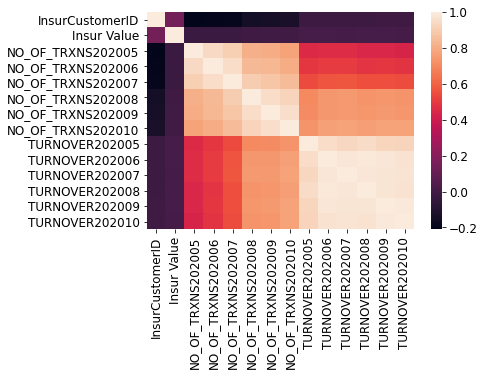

In [29]:
# Correlation Analysis - Validating date and Looking at mulitcollinearity
sns.heatmap(eda.corr())

# 4. Discover and Visualize the Data to Gain some Insights


### 4.1. Univariate function

In [32]:
#The univariate function will plot parameter values in graphs.


def univariate(df,col,vartype,hue =None):    
    '''
    Univariate function will plot parameter values in graphs.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuous or categorical
                Continuous(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : Only applicable in categorical analysis.
    '''
    sns.set(style="darkgrid")
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(eda))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
    plt.show()

### 4.2. Customer Segmentation histogram

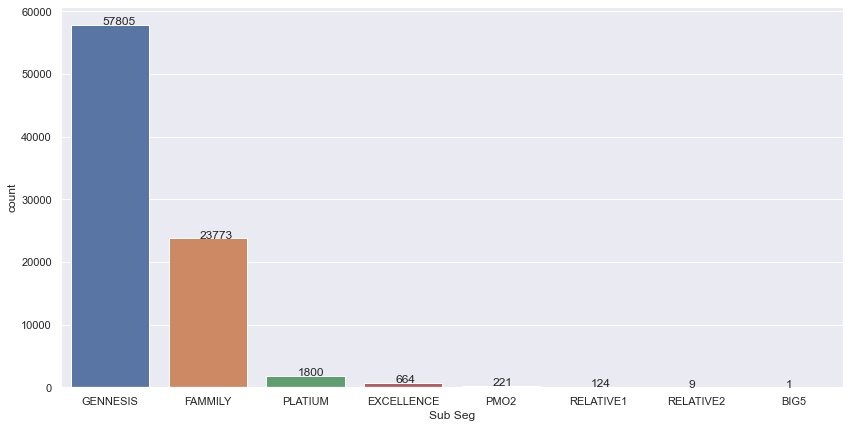

In [38]:
#Segmentation histogram
univariate(df=eda,col='Sub Seg',vartype=1)

### 4.3. Quantity of products purchased acquired per customer



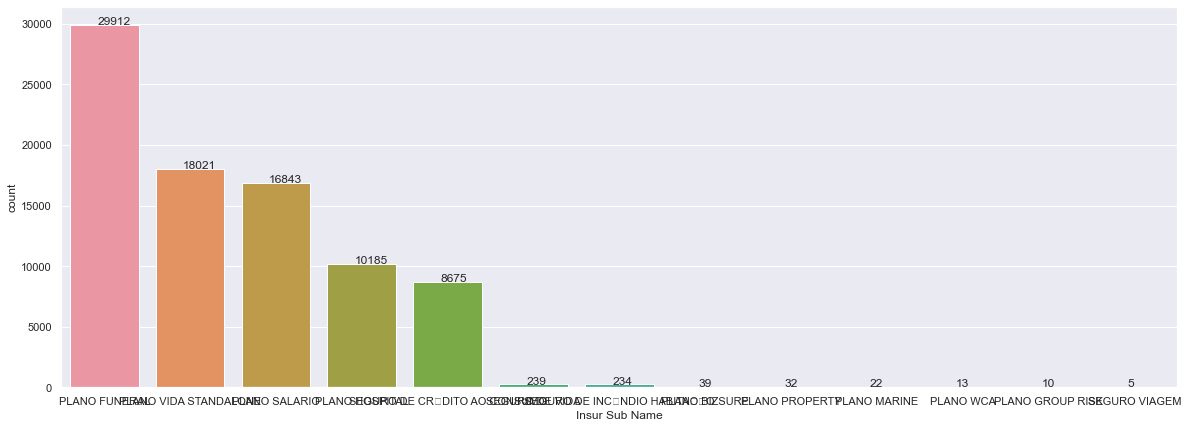

In [39]:
#Quantity of products per customer
univariate(df=eda,col='Insur Sub Name',vartype=1)

### 4.4. Percentage Segmentation through Product  

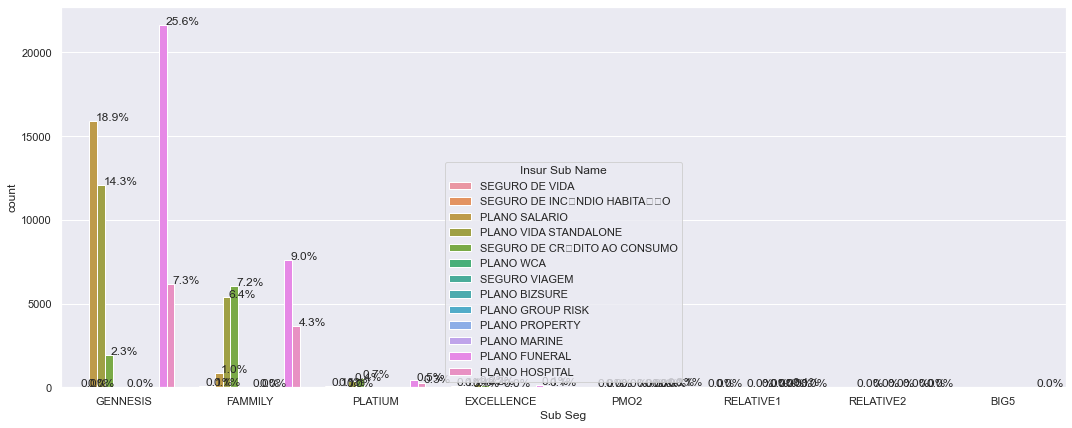

In [44]:
#Segmentation by products
univariate(df=eda,col='Sub Seg',vartype=1,hue='Insur Sub Name')

#### INSIGHTS: Encourage through the FAMMILY segmentation to purchase life insurance and hospital plan products.

## 5. Collaborative filtering for product recommender systems

### 5.1. Load summarized data 

In [66]:
#Load summarized data 
eda_cleaned = eda[['InsurCustomerID', 'Insur Sub Name', 'Sub Seg', 'NO_OF_TRXNS202005']]
eda_cleaned.head(5)

,InsurCustomerID,Insur Sub Name,Sub Seg,NO_OF_TRXNS202005
0,475143751,SEGURO DE VIDA,EXCELLENCE,56.0
1,475143751,SEGURO DE INC�NDIO HABITA��O,EXCELLENCE,56.0
2,628865188,PLANO SALARIO,GENNESIS,9.0
3,169913599,NaN,PMO2,NaN
4,558654486,NaN,FAMMILY,53.0


### 5.2. Examine the most popular products

In [67]:
#Examine the most popular products
eda.groupby('Insur Sub Name').agg(
    orders=('InsurCustomerID', 'nunique'),
    quantity=('NO_OF_TRXNS202005', 'sum')
).sort_values(by='orders', ascending=False).head(15)

,orders,quantity
Insur Sub Name,,
PLANO FUNERAL,26145,358849.0
PLANO VIDA STANDALONE,17077,213009.0
PLANO SALARIO,15802,201919.0
PLANO HOSPITAL,9852,188637.0
SEGURO DE CR�DITO AO CONSUMO,7777,45838.0
SEGURO DE VIDA,228,3786.0
SEGURO DE INC�NDIO HABITA��O,224,2266.0
PLANO BIZSURE,36,0.0
PLANO PROPERTY,30,0.0


### 5.3. Create an item matrix

In [68]:
eda_items = eda.pivot_table(index='InsurCustomerID', columns=['Insur Sub Name'], values='NO_OF_TRXNS202005').fillna(0)
eda_items.head(10)

Insur Sub Name,PLANO FUNERAL,PLANO HOSPITAL,PLANO SALARIO,PLANO VIDA STANDALONE,SEGURO DE CR�DITO AO CONSUMO,SEGURO DE INC�NDIO HABITA��O,SEGURO DE VIDA
InsurCustomerID,,,,,,,
100010600,20.0,20.0,0.0,0.0,0.0,0.0,0.0
100019100,0.0,0.0,0.0,24.0,0.0,0.0,0.0
100117401,17.0,0.0,0.0,0.0,0.0,0.0,0.0
100118401,42.0,0.0,0.0,0.0,0.0,0.0,0.0
100118701,0.0,0.0,0.0,0.0,4.0,0.0,0.0
100210602,95.0,95.0,0.0,0.0,0.0,0.0,0.0
100214502,0.0,0.0,0.0,6.0,0.0,0.0,0.0
100216702,3.0,0.0,0.0,0.0,0.0,0.0,0.0
100219202,0.0,12.0,0.0,0.0,0.0,0.0,0.0


### 5.4. Create product recommendations


In [69]:
def get_recommendations(eda, item):
    """Generate a set of product recommendations using item-based collaborative filtering.
    
    Args:
        df (dataframe): Pandas dataframe containing matrix of items purchased.
        item (string): Column name for target item. 
        
    Returns: 
        recommendations (dataframe): Pandas dataframe containing product recommendations. 
    """
    
    recommendations = eda.corrwith(eda[item])
    recommendations.dropna(inplace=True)
    recommendations = pd.DataFrame(recommendations, columns=['correlation']).reset_index()
    recommendations = recommendations.sort_values(by='correlation', ascending=False)
    
    return recommendations

#### 5.4.1. Reading product recommendations by the most purchased

In [70]:
recommendations = get_recommendations(eda_items, 'PLANO HOSPITAL')
recommendations.head()

,Insur Sub Name,correlation
1,PLANO HOSPITAL,1.000000
0,PLANO FUNERAL,0.258229
3,PLANO VIDA STANDALONE,0.154507
2,PLANO SALARIO,0.034827
5,SEGURO DE INC�NDIO HABITA��O,-0.002885


#### 5.4.2. Reading product recommendations by the least purchased

In [ ]:
recommendations = get_recommendations(eda_items, 'SEGURO VIAGEM')
recommendations.head()

## The cold start problem

##### When products are new, and few customers have purchased them, the amount of information available to recommender systems can be too low to calculate a correlation and the products may not appear within recommendations. This is known as the “cold start”. It takes a time for products to warm up and generate enough data to allow recommender systems to produce relevant results.

### 6. Prepare the Data for Machine Learning Algorithms


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(eda, eda["NO_OF_TRXNS202005"]):
    strat_train_set = eda.loc[train_index]
    strat_test_set = eda.loc[test_index]
    
#eda = strat_train_set.drop("NO_OF_TRXNS202005", axis=1) # drop labels for training set
#eda_labels = strat_train_set["NO_OF_TRXNS202005"].copy()

# The End - Jeremias Tivane